# Polynomial Regression

In [1]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/datasets/laptop_pricing_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [5]:
df.describe()

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


In [6]:
df.drop("Unnamed: 0", axis=1, inplace=True)

Visualize the data

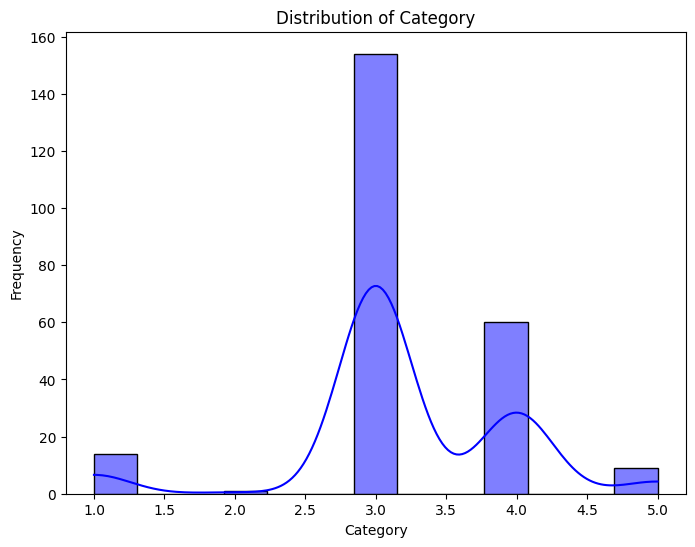

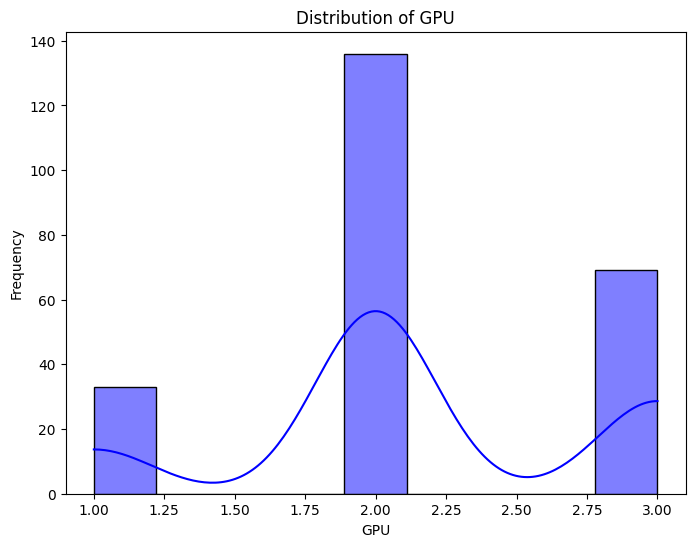

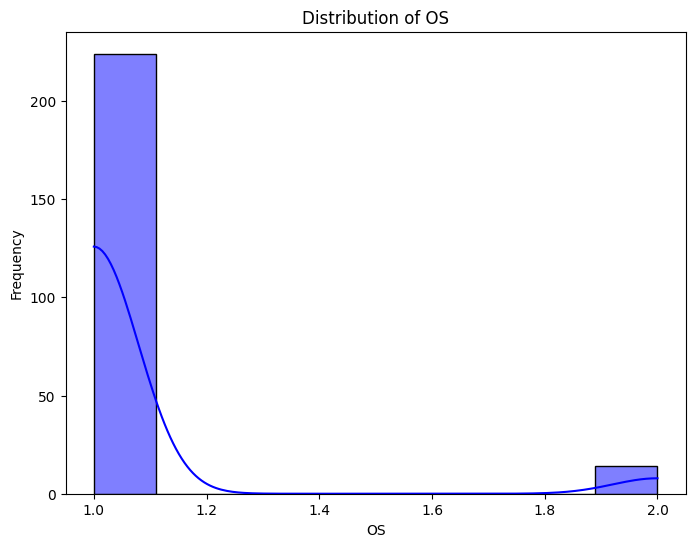

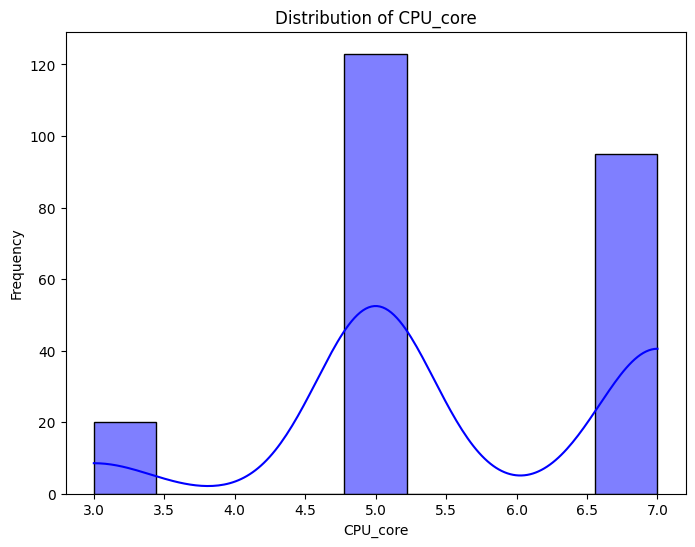

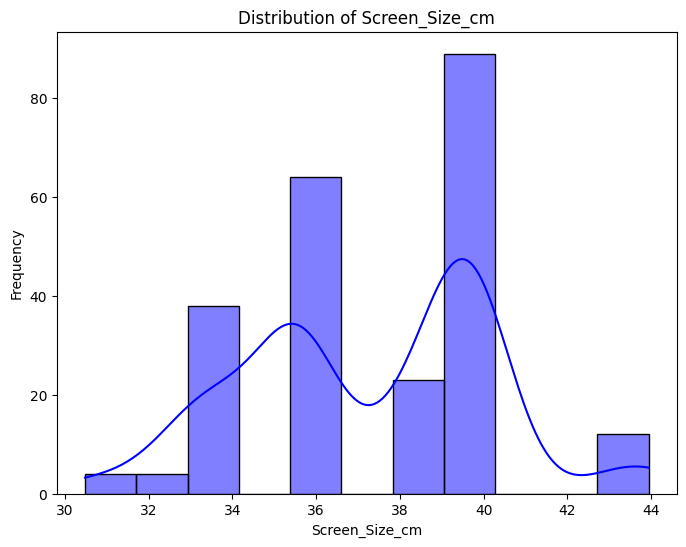

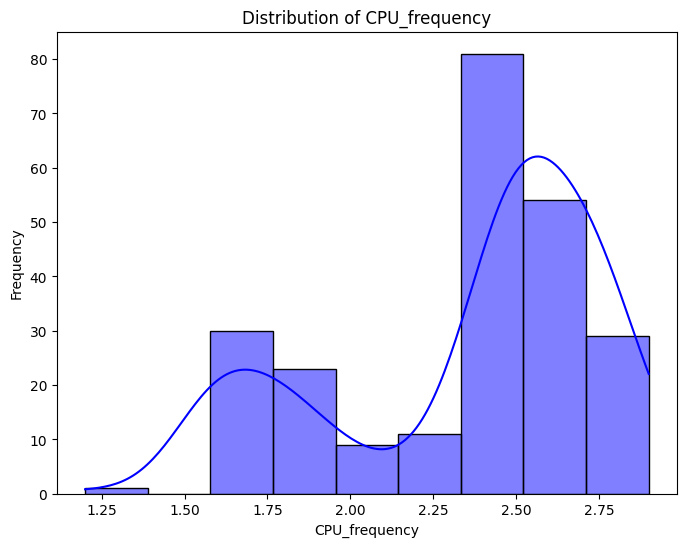

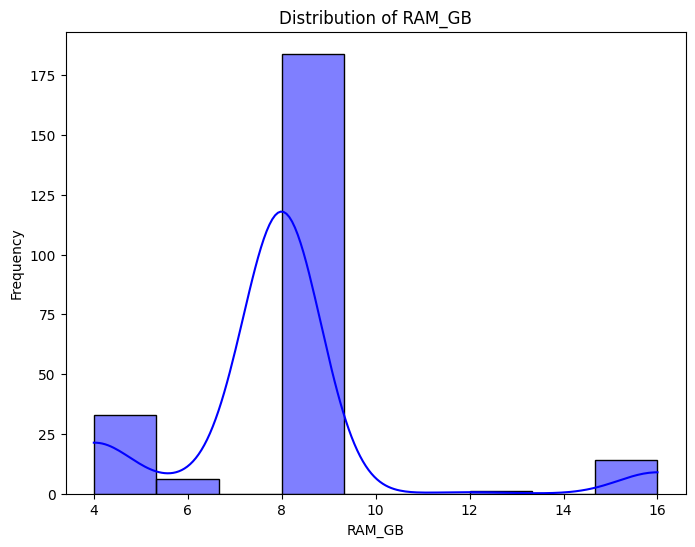

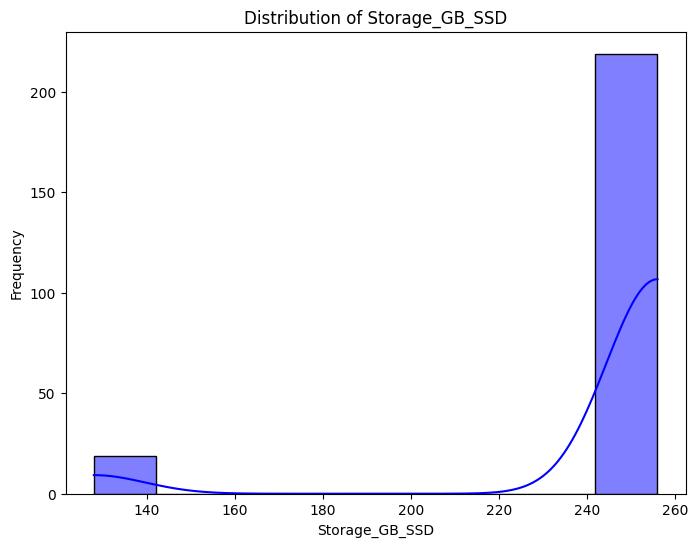

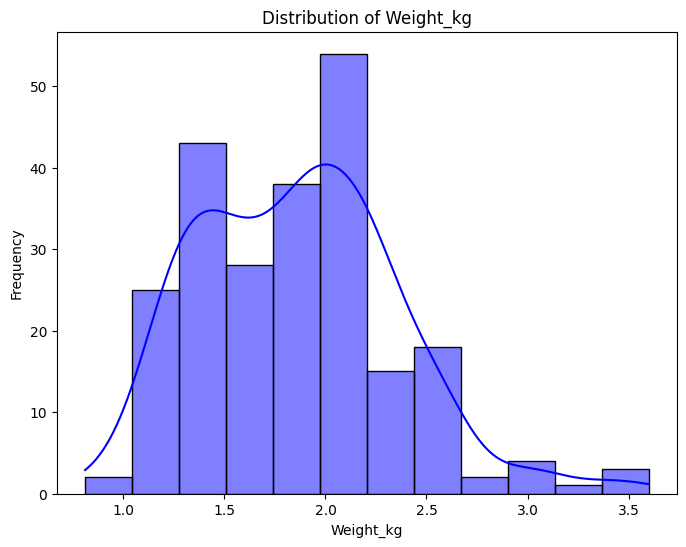

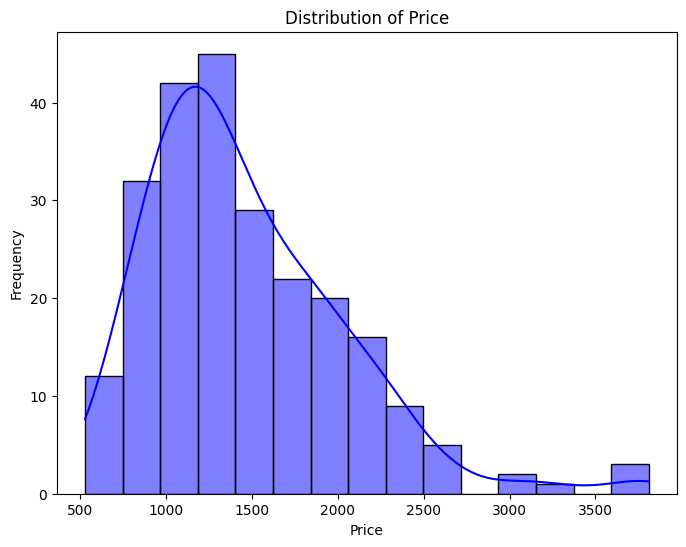

<ipython-input-7-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


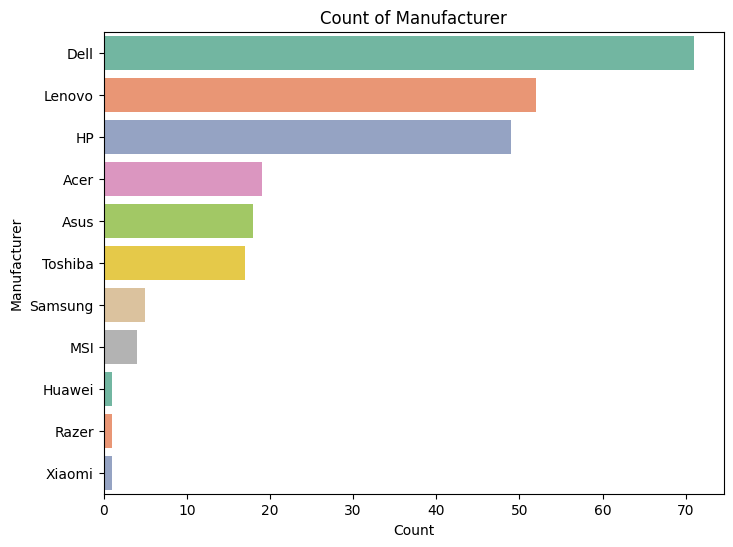

<ipython-input-7-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


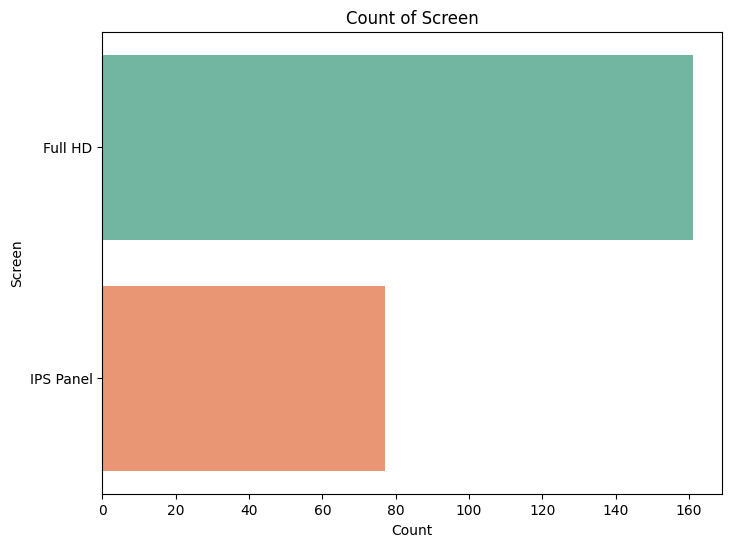

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

In [8]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [9]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

In [11]:
X = df.drop(columns=['Price'])

In [12]:
y = df["Price"]

In [13]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = ['Manufacturer', 'Screen']

In [14]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [15]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', cat_transformer, cat_features)
    ])

In [17]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly_reg = PolynomialFeatures(degree=2)

poly_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', poly_reg)
])

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [26]:
X_train_poly_scaled = poly_reg_pipeline.fit_transform(X_train)
X_valid_poly_scaled = poly_reg_pipeline.transform(X_val)
X_test_poly_scaled = poly_reg_pipeline.transform(X_test)

In [24]:
X_train_poly_scaled

array([[1., 4., 2., ..., 1., 0., 0.],
       [1., 3., 3., ..., 1., 0., 0.],
       [1., 3., 3., ..., 0., 0., 1.],
       ...,
       [1., 5., 3., ..., 1., 0., 0.],
       [1., 3., 2., ..., 0., 0., 1.],
       [1., 3., 1., ..., 0., 0., 1.]])

In [25]:
X_valid_poly_scaled

array([[1., 3., 1., ..., 1., 0., 0.],
       [1., 3., 2., ..., 1., 0., 0.],
       [1., 3., 3., ..., 0., 0., 1.],
       ...,
       [1., 3., 1., ..., 1., 0., 0.],
       [1., 3., 3., ..., 1., 0., 0.],
       [1., 3., 1., ..., 1., 0., 0.]])

In [27]:
X_test_poly_scaled

array([[1., 3., 3., ..., 0., 0., 1.],
       [1., 2., 2., ..., 1., 0., 0.],
       [1., 4., 2., ..., 0., 0., 1.],
       ...,
       [1., 3., 3., ..., 1., 0., 0.],
       [1., 3., 2., ..., 0., 0., 1.],
       [1., 1., 3., ..., 1., 0., 0.]])

# Ridge Regression

In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']

In [29]:
best_alpha

10

In [30]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_poly_scaled, y_train)

Ridge(alpha=10)

Loss Function => RMSE

In [31]:
y_train_pred = ridge.predict(X_train_poly_scaled)
y_valid_pred = ridge.predict(X_valid_poly_scaled)
y_test_pred = ridge.predict(X_test_poly_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_val, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_rmse = np.sqrt(-cross_val_score(ridge, X_train_poly_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())

print("Train RMSE:", train_rmse)
print("Validation RMSE:", valid_rmse)
print("Test RMSE:", test_rmse)
print("Cross-Validation RMSE:", cv_rmse)

Train RMSE: 219.88424976141812
Validation RMSE: 698.8634996852614
Test RMSE: 503.7375796608516
Cross-Validation RMSE: 398.46856571941737


Without Polynomial Features

In [44]:
X_train_encoded =  preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)
X_test_encoded = preprocessor.transform(X_test)

In [45]:
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_encoded, y_train)

best_alpha = grid_search.best_params_['alpha']

In [46]:
best_alpha

10

In [47]:
ridge_without_pf = Ridge(alpha=best_alpha)

In [48]:
ridge_without_pf.fit(X_train_encoded, y_train)

Ridge(alpha=10)

Loss Function => RMSE

In [49]:
y_train_pred = ridge_without_pf.predict(X_train_encoded)
y_valid_pred = ridge_without_pf.predict(X_val_encoded)
y_test_pred = ridge_without_pf.predict(X_test_encoded)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_val, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_rmse = np.sqrt(-cross_val_score(ridge_without_pf, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error').mean())

print("Train RMSE:", train_rmse)
print("Validation RMSE:", valid_rmse)
print("Test RMSE:", test_rmse)
print("Cross-Validation RMSE:", cv_rmse)

Train RMSE: 398.08570435053247
Validation RMSE: 439.9580156969939
Test RMSE: 340.77435219289987
Cross-Validation RMSE: 461.13193572276344


#Lasso Regression

In [50]:
X_train_poly_scaled = poly_reg_pipeline.fit_transform(X_train)
X_valid_poly_scaled = poly_reg_pipeline.transform(X_val)
X_test_poly_scaled = poly_reg_pipeline.transform(X_test)

In [54]:
from sklearn.linear_model import Lasso

parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso(max_iter=10000)  # max_iter increased to avoid ConvergenceWarning
grid_search = GridSearchCV(lasso, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.289e+05, tolerance: 3.075e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.298e+05, tolerance: 3.605e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.021e+05, tolerance: 4.094e

In [55]:
best_alpha

10

In [58]:
lasso = Lasso(alpha=best_alpha, max_iter=10000)
lasso.fit(X_train_poly_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.377e+06, tolerance: 4.655e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10, max_iter=10000)

Loss Function => RMSE

In [59]:
y_train_pred = lasso.predict(X_train_poly_scaled)
y_valid_pred = lasso.predict(X_valid_poly_scaled)
y_test_pred = lasso.predict(X_test_poly_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_val, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_rmse = np.sqrt(-cross_val_score(lasso, X_train_poly_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())

print("Train RMSE:", train_rmse)
print("Validation RMSE:", valid_rmse)
print("Test RMSE:", test_rmse)
print("Cross-Validation RMSE:", cv_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.898e+06, tolerance: 3.075e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.249e+06, tolerance: 3.605e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.392e+06, tolerance: 4.094e

Train RMSE: 245.6452544788951
Validation RMSE: 508.9802753048266
Test RMSE: 367.6458582710081
Cross-Validation RMSE: 393.271797205434


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.749e+06, tolerance: 3.674e+03
  model = cd_fast.enet_coordinate_descent(


Without Polunomial Features

In [60]:
X_train_encoded =  preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)
X_test_encoded = preprocessor.transform(X_test)

In [61]:
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_encoded, y_train)

best_alpha = grid_search.best_params_['alpha']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.834e+05, tolerance: 4.155e+03
  model = cd_fast.enet_coordinate_descent(


In [62]:
best_alpha

1

In [63]:
lasso_without_pf = Lasso(alpha=best_alpha)

In [64]:
lasso_without_pf.fit(X_train_encoded, y_train)

Lasso(alpha=1)

In [65]:
y_train_pred = lasso_without_pf.predict(X_train_encoded)
y_valid_pred = lasso_without_pf.predict(X_val_encoded)
y_test_pred = lasso_without_pf.predict(X_test_encoded)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_val, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_rmse = np.sqrt(-cross_val_score(lasso_without_pf, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error').mean())

print("Train RMSE:", train_rmse)
print("Validation RMSE:", valid_rmse)
print("Test RMSE:", test_rmse)
print("Cross-Validation RMSE:", cv_rmse)

Train RMSE: 383.65307970400494
Validation RMSE: 446.395794091944
Test RMSE: 352.19053513796877
Cross-Validation RMSE: 470.47416776517593


# Elastic Net

In [66]:
X_train_poly_scaled = poly_reg_pipeline.fit_transform(X_train)
X_valid_poly_scaled = poly_reg_pipeline.transform(X_val)
X_test_poly_scaled = poly_reg_pipeline.transform(X_test)

In [67]:
from sklearn.linear_model import ElasticNet

parameters = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
elastic_net = ElasticNet(max_iter=10000)
grid_search = GridSearchCV(elastic_net, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.749e+06, tolerance: 3.075e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.795e+06, tolerance: 3.605e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.882e+06, tolerance: 4.094e

In [68]:
best_alpha

1

In [69]:
best_l1_ratio

0.9

In [70]:
elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net.fit(X_train_poly_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.624e+06, tolerance: 4.655e+03
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1, l1_ratio=0.9, max_iter=10000)

Loss Function< => RMSE

In [71]:
y_train_pred = elastic_net.predict(X_train_poly_scaled)
y_valid_pred = elastic_net.predict(X_valid_poly_scaled)
y_test_pred = elastic_net.predict(X_test_poly_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_val, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_rmse = np.sqrt(-cross_val_score(elastic_net, X_train_poly_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())

print("Train RMSE:", train_rmse)
print("Validation RMSE:", valid_rmse)
print("Test RMSE:", test_rmse)
print("Cross-Validation RMSE:", cv_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.950e+06, tolerance: 3.075e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.428e+06, tolerance: 3.605e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.330e+06, tolerance: 4.094e

Train RMSE: 232.4677776703753
Validation RMSE: 613.5070249970753
Test RMSE: 475.1717392873333
Cross-Validation RMSE: 386.872366843932


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.489e+06, tolerance: 3.674e+03
  model = cd_fast.enet_coordinate_descent(


Without Polynomial Features

In [72]:
X_train_encoded =  preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)
X_test_encoded = preprocessor.transform(X_test)

In [74]:
parameters = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
elastic_net = ElasticNet(max_iter=10000)
grid_search = GridSearchCV(elastic_net, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_encoded, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

In [75]:
best_alpha

0.1

In [76]:
best_l1_ratio

0.3

In [79]:
elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net.fit(X_train_encoded, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.3, max_iter=10000)

Loss Function => RMSE

In [80]:
y_train_pred = elastic_net.predict(X_train_encoded)
y_valid_pred = elastic_net.predict(X_val_encoded)
y_test_pred = elastic_net.predict(X_test_encoded)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_val, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_rmse = np.sqrt(-cross_val_score(elastic_net, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error').mean())

print("Train RMSE:", train_rmse)
print("Validation RMSE:", valid_rmse)
print("Test RMSE:", test_rmse)
print("Cross-Validation RMSE:", cv_rmse)

Train RMSE: 398.0501213797502
Validation RMSE: 439.92343970850584
Test RMSE: 340.79240055436844
Cross-Validation RMSE: 461.03896572823055


# Early Stopping with SGD

In [81]:
X_train_poly_scaled = poly_reg_pipeline.fit_transform(X_train)
X_valid_poly_scaled = poly_reg_pipeline.transform(X_val)
X_test_poly_scaled = poly_reg_pipeline.transform(X_test)

In [82]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(penalty='elasticnet', max_iter=1000, tol=1e-3, early_stopping=True, validation_fraction=0.2)
sgd.fit(X_train_poly_scaled, y_train)

SGDRegressor(early_stopping=True, penalty='elasticnet', validation_fraction=0.2)

Loss Function => RMSE

In [83]:
y_train_pred = sgd.predict(X_train_poly_scaled)
y_valid_pred = sgd.predict(X_valid_poly_scaled)
y_test_pred = sgd.predict(X_test_poly_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_val, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_rmse = np.sqrt(-cross_val_score(sgd, X_train_poly_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())

print("Train RMSE:", train_rmse)
print("Validation RMSE:", valid_rmse)
print("Test RMSE:", test_rmse)
print("Cross-Validation RMSE:", cv_rmse)

Train RMSE: 5.248166907767645e+18
Validation RMSE: 5.065128592862092e+18
Test RMSE: 5.127118957458247e+18
Cross-Validation RMSE: 4.3732984544007905e+18


Without Polynomial Features

In [84]:
X_train_encoded =  preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)
X_test_encoded = preprocessor.transform(X_test)

In [85]:
sgd = SGDRegressor(penalty='elasticnet', max_iter=1000, tol=1e-3, early_stopping=True, validation_fraction=0.2)
sgd.fit(X_train_encoded, y_train)

SGDRegressor(early_stopping=True, penalty='elasticnet', validation_fraction=0.2)

Loss Function => RMSE

In [86]:
y_train_pred = sgd.predict(X_train_encoded)
y_valid_pred = sgd.predict(X_val_encoded)
y_test_pred = sgd.predict(X_test_encoded)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_val, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_rmse = np.sqrt(-cross_val_score(sgd, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error').mean())

print("Train RMSE:", train_rmse)
print("Validation RMSE:", valid_rmse)
print("Test RMSE:", test_rmse)
print("Cross-Validation RMSE:", cv_rmse)

Train RMSE: 22697899114525.453
Validation RMSE: 22021683467707.04
Test RMSE: 22226419470476.04
Cross-Validation RMSE: 60282084315975.695


# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [88]:
X_train_encoded =  preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)
X_test_encoded = preprocessor.transform(X_test)

In [90]:
grid_search = GridSearchCV(logistic_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_encoded, y_train)

best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [91]:
best_model

LogisticRegression(C=10, penalty='l1', solver='liblinear')

Loss Function => RMSE

In [93]:
y_train_pred = best_model.predict(X_train_encoded)
y_valid_pred = best_model.predict(X_val_encoded)
y_test_pred = best_model.predict(X_test_encoded)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_val, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_rmse = np.sqrt(-cross_val_score(best_model, X_train_encoded, y_train, cv=3, scoring='neg_mean_squared_error').mean())

print("Train RMSE:", train_rmse)
print("Validation RMSE:", valid_rmse)
print("Test RMSE:", test_rmse)
print("Cross-Validation RMSE:", cv_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train RMSE: 98.9109002950792
Validation RMSE: 558.5969589068669
Test RMSE: 561.023989386075
Cross-Validation RMSE: 467.8073291984351


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
